In [5]:
import pandas as pd
import numpy as np
import json 
import requests
from io import StringIO
from urllib.request import Request, urlopen
pd.options.display.max_columns = 100


# Gathering
Collecting pieces of data from different resources:

1. The "WeRateDogs" twitter archive given as CSV.
2. Getting Additional Data from Twitter API
3. Using neural network data given as TSV.

In [6]:
#LOADING FIRST PIECE OF DATA

df_eta = pd.read_csv("twitter-archive-enhanced-2.csv")
display(df_eta.sample())

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1362,703041949650034688,NaN,NaN,2016-02-26 02:20:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an East African Chalupa Seal. We only ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None


In [7]:
#CONNECTION WITH TWITTER API
#I PREFERED TO WORK WITH .TXT DOCUMENT GIVEN - WITHOUT A TWITTER ACCOUNT, 
#BUT CODE WAS REQUIRED, SO I'VE COPIED-PASTED

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


ModuleNotFoundError: No module named 'tweepy'

In [8]:
#LOADING SECOND PIECE OF DATA
df_tw = pd.read_json("tweet-json.txt", lines=True)
display(df_tw.sample())

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1131,2016-05-07 00:59:55+00:00,728751179681943552,728751179681943552,This is Flurpson. He can't believe it's not bu...,False,"[0, 57]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 728751174258708481, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,757,3032,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [9]:
#OTHER WAY n°2
data2 = []
with open ("tweet-json.txt") as file:
    for line in file:
        data2.append(json.loads(line))
        
df_tw2 = pd.DataFrame(data2)
display(df_tw2.sample())

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1193,Tue Apr 05 18:41:02 +0000 2016,717421804990701568,717421804990701568,This is Ebby. She's a Zimbabwean Feta. Embarra...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 717421791472431106, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,945,3446,False,False,False,False,en,NaN,NaN,NaN,NaN


In [10]:
#OTHER WAY n°3
with open ("tweet-json.txt") as file:
    data = [json.loads(line) for line in file]

df_tw3 = pd.DataFrame(data)
display(df_tw3.sample())


,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
99,Thu Jun 08 14:20:41 +0000 2017,872820683541237760,872820683541237760,Here are my favorite #dogsatpollingstations \n...,False,"[0, 140]",{'hashtags': [{'text': 'dogsatpollingstations'...,"{'media': [{'id': 872820673743376386, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,3884,15029,False,False,False,False,en,NaN,NaN,NaN,NaN


In [11]:
#LOADING THIRD PIECE OF DATA

url = "https://video.udacity-data.com/topher/2018/November/5bf60c69_image-predictions-3/image-predictions-3.tsv"
response = requests.get(url)

#CHECKING DATATYPE:
display(type(response.content))
display(type(response.text))

df_ip = pd.read_csv(StringIO(response.text), sep="\t")
display(df_ip.sample())

bytes

str

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1553,793165685325201412,https://pbs.twimg.com/media/CwHj-jGWAAAnsny.jpg,1,golden_retriever,0.946224,True,Labrador_retriever,0.036477,True,doormat,0.002353,False


In [12]:
#OTHER WAY:
with open ("image_file.tsv", "wb") as file3:
    file3.write(response.content)

df_ip2 = pd.read_csv("image_file.tsv", sep="\t")
df_ip2.sample()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
689,684188786104872960,https://pbs.twimg.com/media/CX66EiJWkAAVjA-.jpg,1,kelpie,0.537782,True,American_Staffordshire_terrier,0.082953,True,Staffordshire_bullterrier,0.06976,True


# Assesing and Cleaning

Getting insights manually and programatically from dataframes.

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

### Quality Issues:

Issues for "df_eta" from - "twitter-archive-enhanced-2.csv"

1. The "timestamp" column as a string should be changed as datetime data type.
2. We should eliminate  Retweets Records because we don't need retweets, and we have 181.
3. In "doggo", "floofer", "pupper", "puppo" are many null values but marked as "None" string value. I will replace with NaN to get the real number of null values.
4. In "name" column we have the same as previous, many null values but marked as "None" string value. I will replace with NaN. 
5. In "name" column we have 55 "a" values, I will mark as NaN to consider as null values.
6. There are 14 rows that has 2 categories of dog stage (doggo, floofer, pupper, puppo) so to correct I will give a "None" value.
7. We have 59 NaN values in expanded URL column, as we know the value is "https://twitter..." + tweet_id, I will complete them.
8. Delete the 1% of outliers from "rating_numerator" column

### Tidiness Issues:

1. Dataframe "df_eta" contain 4 columns for one variable. We will create a new column named "stage" for this variable and delete the other 4 columns
2. We have the same identifier for 3 dataframe, so we can merge in just one.

In [13]:
display(df_eta.info())
display(df_eta[df_eta.tweet_id == 832215909146226688])
#As we can see, when retweet_status_id is not null, it means it's a retweet.

display(df_eta.rating_numerator.value_counts())
#99% of rating numerator are into range: [0,14] I will delete this 1% of outliers.

display(df_eta.name.value_counts())
#55 observations with "a" value for name column

display(sum(df_eta.expanded_urls.isnull()))
#59 observations with null value in "expanded_urls"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

None

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None


12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Pete         1
Aqua         1
Dale         1
Josep        1
Rumble       1
Name: name, Length: 957, dtype: int64

59

# Quality Issue:
The "timestamp" column as a string should be changed as datetime data type.

#### Define:
Change data type from string to datetime.


#### Code:

In [14]:
#Making a copy:
df_eta_clean = df_eta.copy()

#Change data type from "timestamp" column:
df_eta_clean["timestamp"] = pd.to_datetime(df_eta_clean["timestamp"])


#### Test:

In [15]:
#Checking the new data type:
df_eta_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

# Quality Issue:
In "name" column we have many null values but marked as "None" string value. I will replace with NaN. 

#### Define:
Select columns with "None" value and replace with NaN using numpy

#### Code:

In [16]:
#Changing "None" per NaN value:
df_eta_clean.loc[df_eta_clean["name"]=="None","name"]=np.nan


#### Test:

In [17]:
df_eta_clean.info()
#Now we know that we've just 1611 observations with not null values in name column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

# Quality Issue:
In "name" column we have 55 "a" values, I will mark as NaN to consider as null values.

#### Define:
Select columns with "a" value and replace with NaN using numpy



#### Code:

In [18]:
#Changing "a" per NaN value:
df_eta_clean.loc[df_eta_clean["name"]=="a","name"]=np.nan

#### Test:

In [19]:
df_eta_clean.info()
#Now we know that we've just 1556 observations with not null values in name column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

# Tidiness Issue:
Dataframe "df_eta" contain 4 columns for one variable. We will create a new column named "stage" for this variable and delete the other 4 columns

#### Define:
Replace "None" values per an empty value and concat all values in a new column


#### Code:

In [20]:
#Merging columns N° 13,14,15,16 in just one "stage" column:
df_eta_clean["stage"] = df_eta_clean["doggo"].replace("None","") + df_eta_clean["floofer"].replace("None","") + df_eta_clean["pupper"].replace("None","") + df_eta_clean["puppo"].replace("None","")


#### Test:

In [21]:
df_eta_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
1210,715680795826982913,NaN,NaN,2016-03-31 23:22:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zeus. He's downright fabulous. 12/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715680795...,12,10,Zeus,None,None,None,None,


# Quality Issue:
Empty values into "stage" column and 4 useless columns.

#### Define:
Replace Empty values per Null values and delete the 4 old columns


#### Code:

In [22]:
#Replacing empty values per NaN in the new stage column:
df_eta_clean["stage"] = df_eta_clean["stage"].replace("",np.nan)
#Deleting old columns:
df_eta_clean = df_eta_clean.drop(columns=["doggo","floofer","pupper","puppo"])


#### Test:

In [23]:
#Checking the new dataframe:
df_eta_clean.info()
#Cheking stage values:
display(df_eta_clean["stage"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

pupper          245
doggo            83
puppo            29
doggopupper      12
floofer           9
doggopuppo        1
doggofloofer      1
Name: stage, dtype: int64

# Quality Issue:
We can see doggopupper, doggofloofer, doggopuppo values in stage column  (2x) stages in one observation.

#### Define:
Replace all this values per NaN values.

#### Code:

In [24]:
#Replacing (2x)stages values per NaN value:
df_eta_clean["stage"] = df_eta_clean["stage"].replace("doggopupper",np.nan)
df_eta_clean["stage"] = df_eta_clean["stage"].replace("doggofloofer",np.nan)
df_eta_clean["stage"] = df_eta_clean["stage"].replace("doggopuppo",np.nan)

#### Test:

In [25]:
#Checking new dataframe:
display(df_eta_clean["stage"].value_counts())
df_eta_clean.sample()

pupper     245
doggo       83
puppo       29
floofer      9
Name: stage, dtype: int64

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
326,833826103416520705,NaN,NaN,2017-02-20 23:50:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Charlie. She asked u to change the channe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833826103...,13,10,Charlie,NaN


# Quality Issue:
We should eliminate  Retweets Records because we don't need retweets, and we have 181.

#### Define:
Delete all rows that has value (not blank or not-null) retweeted related columns (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

In [26]:
df_eta_clean = df_eta_clean[df_eta_clean["retweeted_status_id"].isnull()]
df_eta_clean = df_eta_clean[df_eta_clean["retweeted_status_user_id"].isnull()]
df_eta_clean = df_eta_clean[df_eta_clean["retweeted_status_timestamp"].isnull()]

#### Test:

In [27]:
df_eta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

# Quality Issue:
Complete expanded_urls empty cells

#### Define:
Re-write the expanded_urls column

#### Code:

In [28]:
#rewriting "expanded_urls" column:
df_eta_clean["expanded_urls"] = df_eta_clean["tweet_id"].astype(str).apply(lambda x: "https://twitter.com/dog_rates/status/"+x)

#### Test:

In [29]:
#Cheking null values:
display(sum(df_eta_clean["expanded_urls"].isnull()))
#Checking new dataframe:
df_eta_clean.info()

0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2175 non-null   object             
 10  rating_numerator            2175 non-null   int64           

# Quality Issue:
Delete 1% of outliers from rating numerator 

#### Define:
Sort values per rating_numerator and select the first rows that contain the outliers

#### Code:

In [30]:
## Deleting 1% outliers from "rating_numerator"
df_eta_clean.sort_values(by="rating_numerator", ascending=False).head(30)
df_eta_clean = df_eta_clean.sort_values(by="rating_numerator", ascending=False).iloc[27:,:]

#### Test:

In [31]:
#Checking data cleaning - removing outliers
df_eta_clean["rating_numerator"].value_counts()
#Now we have 2148 Rows

12    500
10    442
11    426
13    307
9     156
8      98
7      54
14     42
5      36
6      32
3      19
4      17
2       9
1       8
0       2
Name: rating_numerator, dtype: int64

In [33]:
#Checking second dataframe:
display(df_tw.info())
display(df_tw.sample())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

None

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
322,2017-02-21 17:18:39+00:00,834089966724603904,834089966724603904,DOGGO ON THE LOOSE I REPEAT DOGGO ON THE LOOSE...,False,"[0, 52]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,True,2427,10971,False,False,0.0,0.0,en,NaN,8.340867e+17,8.340867e+17,{'created_at': 'Tue Feb 21 17:05:35 +0000 2017...


In [34]:
#Making a copy:
df_tw_clean = df_tw.copy()

# Quality Issue:
Tweet_id doesn't have the same name

#### Define:
Rename the column "id"

#### Code:

In [35]:
#After to realize that"id" and "id_str" have sometimes different values, I check with one specific id::
display(df_tw[df_tw.index==628])
display(df_eta[df_eta.tweet_id == 794355576146903043])
#"id" is the column that we can rename "tweet_id"

df_tw_clean = df_tw.rename(columns={"id":"tweet_id"})

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
628,2016-11-04 01:48:22+00:00,794355576146903043,794355576146903040,RT @dog_rates: This is Butter. She can have wh...,False,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 788765906553962498, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,12014,0,False,False,0.0,0.0,en,{'created_at': 'Wed Oct 19 15:37:03 +0000 2016...,NaN,NaN,NaN


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
629,794355576146903043,NaN,NaN,2016-11-04 01:48:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Butter. She can have wh...,7.887659e+17,4.196984e+09,2016-10-19 15:37:03 +0000,https://twitter.com/dog_rates/status/788765914...,12,10,Butter,None,None,None,None


#### Test:


In [36]:
df_tw_clean.sample()

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
677,2016-10-21 00:53:56+00:00,789268448748703744,789268448748703744,This is Stella. She's happier than I will ever...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 789268438468423680, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,NaN,False,3014,10196,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [37]:
#Creating a short dataframe with usefull data for analysis:
df_tw_clean = df_tw_clean[["tweet_id","retweet_count","favorite_count"]]
df_tw_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [38]:
#Checking dataframe N° 3
display(df_ip.info())
df_ip.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


None

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1977,870374049280663552,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,golden_retriever,0.841001,True,Great_Pyrenees,0.099278,True,Labrador_retriever,0.032621,True


In [39]:
#Making a copy to clean:
df_ip_clean = df_ip.copy()

# Quality Issue:
Breed prediction, confidence level and boolean if it's a dog columns (9) are 3 variables

#### Define:
Melt dataframe and get one columns per each variable

#### Code:

In [40]:
#Melting given dataframe in 3 new dataframes for each number of prediction:
df1 = df_ip_clean.drop(columns=["p2","p2_conf","p2_dog","p3", "p3_conf", "p3_dog"])
df1 = pd.melt(df1, id_vars=["tweet_id","jpg_url","img_num"], value_vars=["p1"], var_name="n_pred", value_name="breed_pred")
df1[["confidence","is_dog"]] = df_ip_clean[["p1_conf","p1_dog"]]

df2 = df_ip_clean.drop(columns=["p1","p1_conf","p1_dog","p3", "p3_conf", "p3_dog"])
df2 = pd.melt(df2, id_vars=["tweet_id","jpg_url","img_num"], value_vars=["p2"], var_name="n_pred", value_name="breed_pred")
df2[["confidence","is_dog"]] = df_ip_clean[["p2_conf","p2_dog"]]

df3 = df_ip_clean.drop(columns=["p2","p2_conf","p2_dog","p1", "p1_conf", "p1_dog"])
df3 = pd.melt(df3, id_vars=["tweet_id","jpg_url","img_num"], value_vars=["p3"], var_name="n_pred", value_name="breed_pred")
df3[["confidence","is_dog"]] = df_ip_clean[["p3_conf","p3_dog"]]

#### Test:

In [41]:
display(df1.sample(), df2.sample(), df3.sample())

,tweet_id,jpg_url,img_num,n_pred,breed_pred,confidence,is_dog
1287,751132876104687617,https://pbs.twimg.com/media/CmyPXNOW8AEtaJ-.jpg,1,p1,Labrador_retriever,0.92939,True


,tweet_id,jpg_url,img_num,n_pred,breed_pred,confidence,is_dog
1307,753420520834629632,https://pbs.twimg.com/ext_tw_video_thumb/75342...,1,p2,lakeside,0.085764,False


,tweet_id,jpg_url,img_num,n_pred,breed_pred,confidence,is_dog
1147,730924654643314689,https://pbs.twimg.com/media/CiTEFjDXAAAqU6I.jpg,1,p3,Newfoundland,0.086241,True


In [42]:
#Merge 3 dataframes from predictions in a final one.
df_ip_clean = pd.concat([df1,df2,df3], ignore_index=True)
df_ip_clean.shape

(6225, 7)

# Tidiness Issue:
We have the same identifier for 3 dataframe, so we can merge in just one

#### Define:
Merge 3 dataframes in just 1



In [43]:
#Combining df_eta_clean with df_tw_clean:
comb1_df = df_eta_clean.merge(df_tw_clean, how="left", on="tweet_id")
#combining the last dataframe with df1 (the dataframe with best image confidence predictions for analysis)
comb2_df = comb1_df.merge(df1, how="left", on="tweet_id")

#### Test:

In [44]:
#Validating the merge:
display(comb2_df.sample())

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,img_num,n_pred,breed_pred,confidence,is_dog
813,833124694597443584,NaN,NaN,2017-02-19 01:23:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Gidget. She's a spy pupper. Stealthy a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833124694...,12,10,Gidget,pupper,5513,22133,https://pbs.twimg.com/media/C4_ad1IUoAEspsk.jpg,3.0,p1,Cardigan,0.710523,True


# Storing the final dataframe

In [45]:
#Creating and exporting the master dataframe to a CSV file:
comb2_df.to_csv("twitter_archive_master.csv", index=False)

# Getting some insights from analysis:


I. Some analysis from dogs stages

<AxesSubplot:ylabel='stage'>

Charlie    10
Cooper     10
Oliver      9
Lucy        8
Tucker      8
           ..
Ronnie      1
Karll       1
CeCe        1
Brutus      1
Sage        1
Name: name, Length: 756, dtype: int64

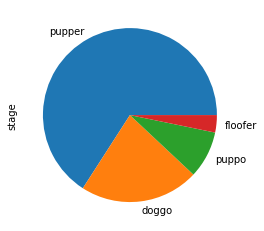

In [62]:
display(comb2_df["stage"].value_counts().sort_values(ascending=False).plot.pie())
display(comb2_df["name"].value_counts().sort_values(ascending=False))


The most common stage of dog that the people publish in WeRateDogs is Pupper (68%)
And The most common names for dogs in WeRateDogs are: Charlie, Lucy, Oliver, Tucker, Bo

In [48]:
comb2_df[comb2_df["stage"]=="doggo"].describe().iloc[:,5:]


,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,confidence
count,75.000000,75.0,75.000000,75.000000,63.000000,63.000000
mean,11.853333,10.0,6348.786667,17369.093333,1.285714,0.577058
std,1.430303,0.0,11939.932686,20970.142975,0.658164,0.266157
min,8.000000,10.0,39.000000,758.000000,1.000000,0.100896
25%,11.000000,10.0,1948.500000,6461.500000,1.000000,0.393470
50%,12.000000,10.0,2882.000000,11519.000000,1.000000,0.571229
75%,13.000000,10.0,5145.000000,18421.000000,1.000000,0.784591
max,14.000000,10.0,79515.000000,131075.000000,4.000000,0.999962


In [49]:
comb2_df[comb2_df["stage"]=="puppo"].describe().iloc[:,5:]


,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,confidence
count,24.000000,24.0,24.000000,24.000000,22.000000,22.000000
mean,12.041667,10.0,6332.500000,20788.875000,1.454545,0.722293
std,1.267629,0.0,9948.301734,27097.969414,0.670982,0.215132
min,9.000000,10.0,179.000000,1614.000000,1.000000,0.196015
25%,11.750000,10.0,1648.750000,6746.750000,1.000000,0.606332
50%,12.000000,10.0,3130.000000,13387.500000,1.000000,0.733124
75%,13.000000,10.0,7044.250000,20450.500000,2.000000,0.918011
max,14.000000,10.0,48265.000000,132810.000000,3.000000,0.999984


In [50]:
comb2_df[comb2_df["stage"]=="pupper"].describe().iloc[:,5:]


,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,confidence
count,223.000000,223.0,223.000000,223.000000,202.000000,202.000000
mean,10.735426,10.0,2460.291480,7175.623318,1.252475,0.602998
std,1.712948,0.0,3772.223435,10532.383412,0.662138,0.269776
min,3.000000,10.0,26.000000,269.000000,1.000000,0.059033
25%,10.000000,10.0,687.000000,2423.500000,1.000000,0.376657
50%,11.000000,10.0,1239.000000,3306.000000,1.000000,0.640126
75%,12.000000,10.0,2482.000000,7669.000000,1.000000,0.836534
max,14.000000,10.0,32883.000000,106827.000000,4.000000,0.999846


In [51]:
comb2_df[comb2_df["stage"]=="floofer"].describe().iloc[:,5:]


,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,confidence
count,9.000000,9.0,9.000000,9.000000,7.000000,7.000000
mean,11.888889,10.0,4155.888889,11064.444444,1.142857,0.609204
std,1.054093,0.0,5590.254566,10680.460853,0.377964,0.344807
min,10.000000,10.0,496.000000,1618.000000,1.000000,0.155144
25%,11.000000,10.0,1141.000000,4015.000000,1.000000,0.380214
50%,12.000000,10.0,2509.000000,6076.000000,1.000000,0.457356
75%,13.000000,10.0,3825.000000,12456.000000,1.000000,0.951751
max,13.000000,10.0,18497.000000,33345.000000,2.000000,0.987997


,rating_numerator
stage,
puppo,12.041667
floofer,11.888889
doggo,11.853333
pupper,10.735426


<AxesSubplot:ylabel='stage'>

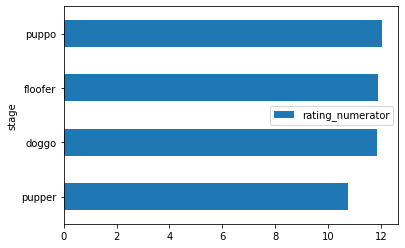

In [52]:
#Analysis for rating according to dog stage:
display(pd.pivot_table(comb2_df, index="stage", values="rating_numerator", aggfunc=np.mean).sort_values("rating_numerator", ascending=False))
pd.pivot_table(comb2_df, index="stage", values="rating_numerator", aggfunc=np.mean).sort_values("rating_numerator", ascending=True).plot.barh()

,favorite_count,retweet_count
stage,,
puppo,22308.210526,6551.473684
doggo,20556.354167,7594.854167
floofer,13206.000000,4968.714286
pupper,8053.524476,2561.727273


<AxesSubplot:ylabel='stage'>

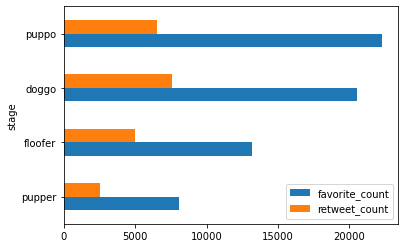

In [61]:
#Analysis for actions on twitter (retweet and favorite) according to dog stage:
display(pd.pivot_table(comb2_df, index="stage", values=["retweet_count","favorite_count"], aggfunc=np.mean).sort_values("favorite_count", ascending=False))
pd.pivot_table(comb2_df, index="stage", values=["retweet_count","favorite_count"], aggfunc=np.mean).sort_values("favorite_count", ascending=True).plot.barh()


#### Insight N°1
Even if puppers are the most common published dogs in WeRateDogs, they have the worst rating average and also the less favorite and retweet counts.

II. Some analysis for image predictors

<AxesSubplot:ylabel='img_num'>

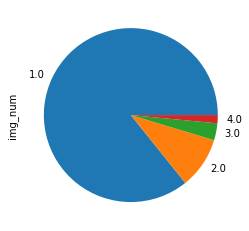

In [54]:
#Deleting observations with no image, because aren´t predictions:
comb2_df = comb2_df[comb2_df["jpg_url"].notnull()]
comb2_df.img_num.value_counts().plot.pie()

#### Insight N°2
In General, the image predictor get his best accuracy level with the first image

<AxesSubplot:ylabel='is_dog'>

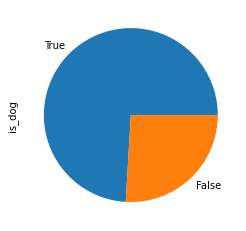

In [55]:
comb2_df["is_dog"].value_counts().plot.pie()

74% of the observations the predictor response a breed of dog.

In [56]:
#Deleting observations where predictor says something that's not a breed of dog:
comb2_df = comb2_df[comb2_df["is_dog"]==True]
comb2_df["breed_pred"].value_counts()


golden_retriever      136
Labrador_retriever     92
Pembroke               88
Chihuahua              79
pug                    54
                     ... 
groenendael             1
Japanese_spaniel        1
standard_schnauzer      1
EntleBucher             1
silky_terrier           1
Name: breed_pred, Length: 110, dtype: int64

In [57]:
df_a = pd.pivot_table(comb2_df, index="breed_pred", values=["confidence"], aggfunc=np.mean).sort_values("confidence", ascending=False)
df_b = pd.pivot_table(comb2_df, index="breed_pred", values=["n_pred"], aggfunc=np.count_nonzero).sort_values("n_pred", ascending=False)

df_c = df_a.merge(df_b, how="left", on="breed_pred")

In [65]:
df_c.sort_values("n_pred", ascending=False)

,confidence,n_pred
breed_pred,,
golden_retriever,0.726270,136
Labrador_retriever,0.655582,92
Pembroke,0.717223,88
Chihuahua,0.588905,79
pug,0.759223,54
...,...,...
Japanese_spaniel,0.661178,1
silky_terrier,0.324251,1
standard_schnauzer,0.441427,1


,confidence,n_pred
breed_pred,,
komondor,0.972531,3
Brittany_spaniel,0.874545,7
keeshond,0.844431,4
bull_mastiff,0.815618,5
Bernese_mountain_dog,0.801816,10
...,...,...
wire-haired_fox_terrier,0.305596,2
Norwich_terrier,0.295496,4
Scotch_terrier,0.267979,1


<AxesSubplot:xlabel='breed_pred'>

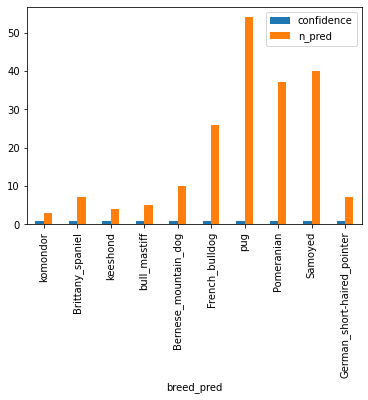

In [59]:
display(df_c.sort_values("confidence", ascending=False))
df_c.sort_values("confidence", ascending=False).head(10).plot.bar()

#### Insight N°3
- We have some breeds with high levels (>85%) of prediction confidence (komondor, brittany_spaniel, bull_mastiff), but this number is based in just some observations, so we can't really ensure that.
- In the other hand we can see there are some breeds with high quantity of observations, and in general confidence prediction is around 60-70%.